In [14]:
#Import dependencies
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Importing csv files to create dataframe
movie_data = "C:/Users/Lilia/Desktop/Final Project - Local/Data/movies.csv"
movies_df = pd.read_csv(movie_data)
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [9]:
# Importing csv files to create dataframe
ratings_data = "C:/Users/Lilia/Desktop/Final Project - Local/Data/ratings.csv"
ratings_df = pd.read_csv(ratings_data)
ratings_df

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


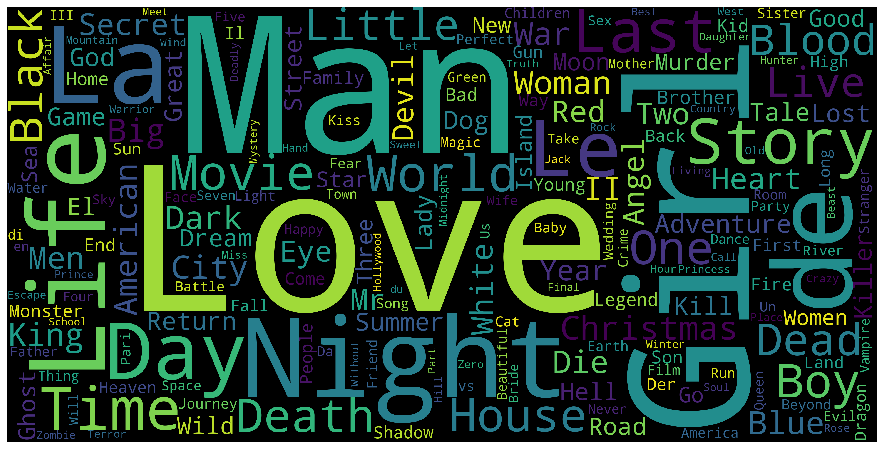

In [8]:
# Create a wordcloud of the movie titles
movies_df['title'] = movies_df['title'].fillna("").astype('str')
title_corpus = ' '.join(movies_df['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [11]:
# Get summary statistics of rating
ratings_df['rating'].describe()

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

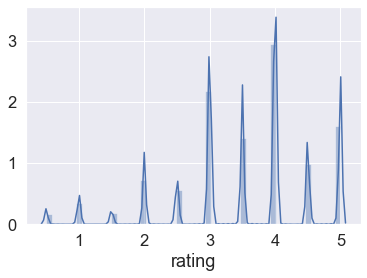

In [15]:
# Import seaborn library
sns.set_style('whitegrid')
sns.set(font_scale=1.5)


# Display distribution of rating
sns.distplot(ratings_df['rating'].fillna(ratings_df['rating'].median()))

In [19]:
# Join all 3 files into one dataframe
dataset = pd.merge(movies_df, ratings_df)
# Display 20 movies with highest ratings
dataset[['title','genres','rating']].sort_values('rating', ascending=False).head(20)

,title,genres,rating
11367437,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5.0
3719204,Tombstone (1993),Action|Drama|Western,5.0
22989199,Intouchables (2011),Comedy|Drama,5.0
22989200,Intouchables (2011),Comedy|Drama,5.0
3719210,Tombstone (1993),Action|Drama|Western,5.0
13916199,Gladiator (2000),Action|Adventure|Drama,5.0
13916198,Gladiator (2000),Action|Adventure|Drama,5.0
13916197,Gladiator (2000),Action|Adventure|Drama,5.0
3719201,Tombstone (1993),Action|Drama|Western,5.0
20769882,Harry Potter and the Order of the Phoenix (2007),Adventure|Drama|Fantasy|IMAX,5.0


In [20]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies_df['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies_df, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 25606],
 ['Comedy', 16870],
 ['Thriller', 8654],
 ['Romance', 7719],
 ['Action', 7348]]

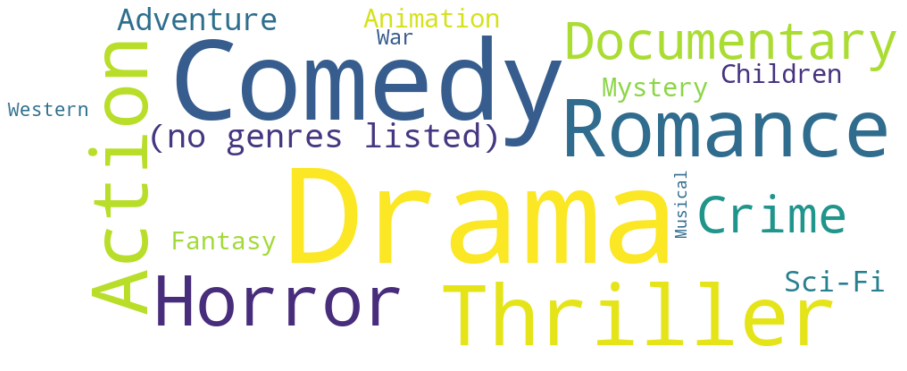

In [21]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()